# Linear Regression

In [1]:
import numpy as np
import sklearn.linear_model as lm
from sklearn.metrics import r2_score
import sklearn.model_selection as ms
import pandas as pd
import matplotlib.pyplot as plt

## Membuat Class LinearRegression

## Simple LinearRegression

In [2]:
class LinearRegression:
    def __init__(self):
        self.X = 0
        self.y = 0
        self.jumlah = 0

    def fit(self,X, y):
        self.X = X
        self.y = y
        self.X = np.array(self.X)
        self.y = np.array(self.y)

    def mean(self, x):
        self.jumlah = x
        return sum(self.jumlah) / len(self.jumlah)

    def slope(self):
        return np.array(self.covariance() / self.variance(self.X)).reshape(1, len(self.X[0]))

    def covariance(self):
        return (sum((self.X - np.mean(self.X))*(self.y - np.mean(self.y)))) / (len(self.X) - 1)

    # Mencari Variance dengan module numpy
    def variance2(self, x):
        x = np.array(x)
        return  np.var(x.flatten(), ddof=1)

    def variance(self, x):
        x = np.array(x).flatten()
        return sum((x - np.mean(x)) ** 2) / (len(x) - 1)

    def intercept(self):
        return np.array(np.mean(self.y) - self.slope() * self.mean(self.X)).reshape(len(self.X[0]))

    def predict(self, x):
        hasil = self.intercept() + self.slope() * x
        return np.array(hasil)

    def r_squared(self, ytest, yprediksi):
        ytest = np.array(ytest)
        yprediksi = np.array(yprediksi)
        ss_res = sum((ytest - yprediksi) ** 2)  
        ss_tot = sum((ytest - self.mean(ytest))**2)
        hasil = 1 - (ss_res / ss_tot)
        return hasil[0]

    

In [3]:
x = [6, 8, 10, 14, 18]
y = [7., 9., 13., 17.5, 18.]
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

xtest = np.array([8, 9, 11, 16, 12]).reshape(-1,1)
ytest = np.array([11, 8.5, 15, 18, 11]).reshape(-1,1)

data = pd.read_csv("bensin.csv")
X = data[[ "Liter"]]
Y = data[["Kilometer"]]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.2)


# Menggunakan model buatan sendiri
model = LinearRegression()
model.fit(X_train, y_train)
slope = model.slope()
intercept = model.intercept()
prediksi = model.predict(X_test)
r = model.r_squared(y_test, prediksi)

# Menggunakan model buatan scikit-learn
model2 = lm.LinearRegression()
model2.fit(X_train, y_train)
prediksibaru = model2.predict(X_test)
r2 = r2_score(y_test, prediksibaru)



print("Hasil dari module LinearRegression buatan Sendiri")
print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"r: {r}")
print(f"prediksi: {prediksi}")

print()

print("Hasil dari module scikit-learn")
print(f"slope: {model2.coef_}")
print(f"intercept: {model2.intercept_}")
print(f"r2: {r2}")
print(f"prediksibaru: {prediksibaru}")


Hasil dari module LinearRegression buatan Sendiri
slope: [[6.65375262]]
intercept: [5.62404202]
r: 0.9653922401410991
prediksi: [[238.50538383]
 [158.66035235]
 [132.04534186]
 [185.27536285]
 [171.9678576 ]
 [238.50538383]
 [278.42789957]
 [171.9678576 ]
 [238.50538383]
 [178.62161022]
 [205.23662072]
 [171.9678576 ]
 [ 98.77657875]]

Hasil dari module scikit-learn
slope: [[6.65375262]]
intercept: [5.62404202]
r2: 0.9653922401410991
prediksibaru: [[238.50538383]
 [158.66035235]
 [132.04534186]
 [185.27536285]
 [171.9678576 ]
 [238.50538383]
 [278.42789957]
 [171.9678576 ]
 [238.50538383]
 [178.62161022]
 [205.23662072]
 [171.9678576 ]
 [ 98.77657875]]


## Visualisasi Data

hasil dari module linear Regression buatan sendiri

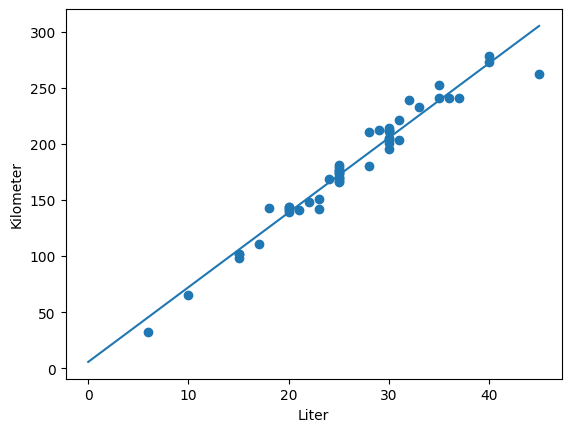

In [4]:
Xtest = np.linspace(0, 45)
Xtest = np.array(Xtest).reshape(len(Xtest), 1)
prediksi1 = model.predict(Xtest)
plt.scatter(X_train, y_train)
plt.plot(Xtest, prediksi1)
plt.xlabel("Liter")
plt.ylabel("Kilometer")
plt.show()

hasil dari module Scikit-Learn

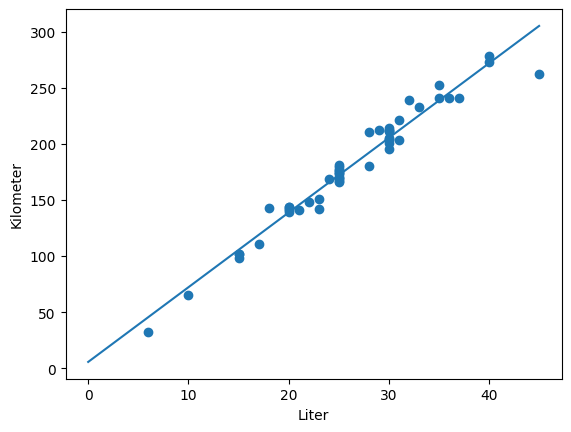

In [5]:
Xtest2 = np.linspace(0,45)
prediksi2 = model2.intercept_[0] + model2.coef_[0][0] * Xtest2
plt.scatter(X_train, y_train)
plt.plot(Xtest2, prediksi2)
plt.xlabel("Liter")
plt.ylabel("Kilometer")
plt.show()